In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
credit = pd.read_csv('creditcard.csv')

In [3]:
credit.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [4]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


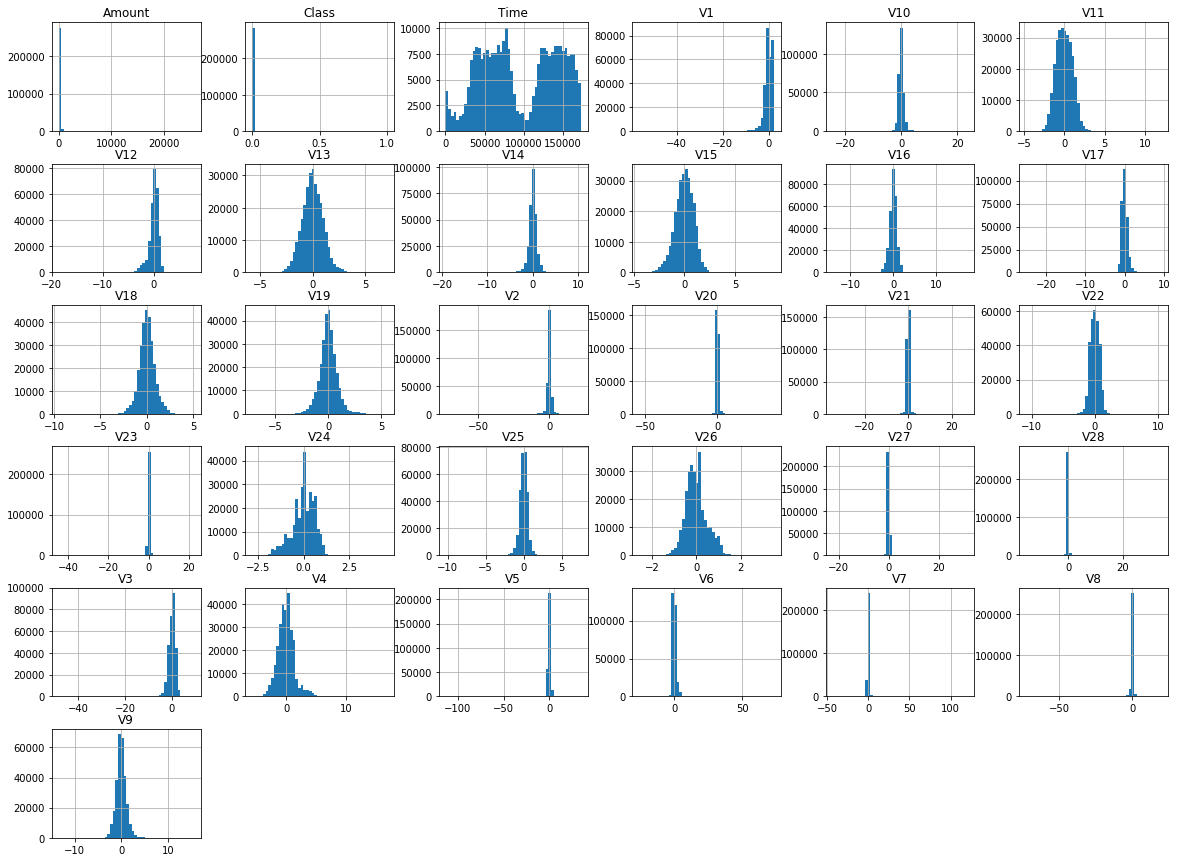

In [5]:
credit.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
X = credit.drop(columns='Class')
y = credit.Class

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y)

In [8]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(class_weight={1.0 : 5, 0.0 : .1})
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight={1.0: 5, 0.0: 0.1},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [9]:
y_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight={1.0: 10, 0.0 : .1})

lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={1.0: 10, 0.0: 0.1}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [11]:
log_pred = lr.predict(X_train)
log_test_pred = lr.predict(X_test)

Now to compare the models even though the random forest is clearly way better than the logistic regression in this case.

In [12]:
# Getting the average precision-recall score for the training data with rfc/log
from sklearn.metrics import average_precision_score

avg_precision_rfc = average_precision_score(y_train, y_pred)
avg_precision_log = average_precision_score(y_train, log_pred)

print('Average precision-recall score for rfc Train: {0:0.2f}'.format(
    avg_precision_rfc))
print('Average precision-recall score for log Train: {0:0.2f}'.format(
    avg_precision_log))

# Yikes, if that's not enough...

Average precision-recall score for rfc Train: 0.96
Average precision-recall score for log Train: 0.23


In [13]:
avg_precision_rfc_test = average_precision_score(y_test, y_test_pred)
avg_precision_log_test = average_precision_score(y_test, log_test_pred)

print('Average precision-recall score for rfc Test: {0:0.2f}'.format(
    avg_precision_rfc_test))

print('Average precision-recall score for log Test: {0:0.2f}'.format(
    avg_precision_log_test))

# The random forest is still much better than the logistic regression but
# It sure does overfit something fierce!

Average precision-recall score for rfc Test: 0.74
Average precision-recall score for log Test: 0.24


In [14]:
from sklearn import ensemble

clf = ensemble.GradientBoostingClassifier(n_estimators=100,
                                          max_depth=2,
                                          loss='deviance')
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [15]:
clf2 = ensemble.GradientBoostingClassifier(n_estimators=50,
                                          max_depth=2,
                                          loss='deviance')
clf2.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [16]:
clf3 = ensemble.GradientBoostingClassifier(n_estimators=50,
                                          max_depth=4,
                                          loss='deviance')
clf3.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [17]:
clf3_pred_train = clf3.predict(X_test)
avg_precision_clf3_train = average_precision_score(y_test, clf3_pred_train)
print(avg_precision_clf3_train)

0.3604361113027261


In [18]:
clf_predict_train = clf.predict(X_train)
clf_predict_test = clf.predict(X_test)

avg_precision_clf_train = average_precision_score(y_train, clf_predict_train)
avg_precision_clf_test = average_precision_score(y_test, clf_predict_test)

In [19]:
print('Average precision-recall score for clf Train: {0:0.2f}'.format(
    avg_precision_clf_train))

print('Average precision-recall score for clf Test: {0:0.2f}'.format(
    avg_precision_clf_test))

Average precision-recall score for clf Train: 0.30
Average precision-recall score for clf Test: 0.25


To sum up: random forest was fairly consistent but also overfitting a lot.
Logistic regression was just bad.
Gradient boosting was highly inconsistent.

I'll go with random forest on this one thank you very much.